In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Analysis of Central Government Debt across countries of different income levels

#### Data Cleaning


In [38]:
#read data
file_path=r"C:\Users\User\Desktop\Global Debt Database\central_government_debt.csv"
central_govdebt=pd.read_csv(file_path,encoding='latin1')

In [39]:
tidy_df = pd.melt(central_govdebt, id_vars=['country_name', 'indicator_name'], var_name='year', value_name='debt_value')

In [40]:
tidy_df.head()

country_name                                     indicator_name  \
0          Afghanistan  Annual average of central government debt (Per...   
1              Albania  Annual average of central government debt (Per...   
2              Algeria  Annual average of central government debt (Per...   
3               Angola  Annual average of central government debt (Per...   
4  Antigua and Barbuda  Annual average of central government debt (Per...   

   year  debt_value  
0  1950         NaN  
1  1950         NaN  
2  1950         NaN  
3  1950         NaN  
4  1950         NaN

In [41]:
#Filter out to include only sample countries
countries=['Chad','Niger','Burkina Faso','Sri Lanka','Bolivia','Kenya','Mexico','Argentina',
           'Indonesia','Saudi Arabia','Germany','United States']

In [42]:
tidy_df=tidy_df[tidy_df['country_name'].isin(countries)]

In [43]:
tidy_df['country_name'].value_counts()

country_name
Argentina        73
Bolivia          73
Burkina Faso     73
Chad             73
Germany          73
Indonesia        73
Kenya            73
Mexico           73
Niger            73
Saudi Arabia     73
Sri Lanka        73
United States    73
Name: count, dtype: int64

In [44]:
tidy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 5 to 12620
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    876 non-null    object 
 1   indicator_name  876 non-null    object 
 2   year            876 non-null    object 
 3   debt_value      707 non-null    float64
dtypes: float64(1), object(3)
memory usage: 34.2+ KB


In [45]:
#filter out years outside 2010-2022
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
tidy_df=tidy_df.loc[tidy_df['year'].isin(years)]

In [46]:
tidy_df

country_name                                     indicator_name  year  \
10385      Argentina  Annual average of central government debt (Per...  2010   
10399        Bolivia  Annual average of central government debt (Per...  2010   
10405   Burkina Faso  Annual average of central government debt (Per...  2010   
10411           Chad  Annual average of central government debt (Per...  2010   
10437        Germany  Annual average of central government debt (Per...  2010   
...              ...                                                ...   ...   
12557         Mexico  Annual average of central government debt (Per...  2022   
12568          Niger  Annual average of central government debt (Per...  2022   
12588   Saudi Arabia  Annual average of central government debt (Per...  2022   
12600      Sri Lanka  Annual average of central government debt (Per...  2022   
12620  United States  Annual average of central government debt (Per...  2022   

       debt_value  
10385   43.454315  
10399   34.407332  
10405   27.819274  
10411   30.050703  
10437   52.143191  
...           ...  
12557   40.858075  
12568   51.075502  
12588   22.572861  
12600  117.661325  
12620  110.146803  

[156 rows x 4 columns]

In [47]:
# Add a column of income levels to make groupby easy
income_levels = {
    'Argentina': 'Upper-middle Income',
    'Bolivia': 'Lower-middle Income',
    'Burkina Faso': 'Low Income',
    'Chad':'Low Income',
    'Germany':'High Income',
    'Indonesia':'Upper-middle Income',
    'Kenya':'Lower-middle Income',
    'Mexico':'Upper-middle Income',
    'Niger':'Low Income',
    'Saudi Arabia':'High Income',
    'Sri Lanka':'Lower-middle Income',
    'United States':'High Income'}

In [48]:
tidy_df['income_level'] = tidy_df['country_name'].map(income_levels)

In [49]:
tidy_df.head()

country_name                                     indicator_name  year  \
10385     Argentina  Annual average of central government debt (Per...  2010   
10399       Bolivia  Annual average of central government debt (Per...  2010   
10405  Burkina Faso  Annual average of central government debt (Per...  2010   
10411          Chad  Annual average of central government debt (Per...  2010   
10437       Germany  Annual average of central government debt (Per...  2010   

       debt_value         income_level  
10385   43.454315  Upper-middle Income  
10399   34.407332  Lower-middle Income  
10405   27.819274           Low Income  
10411   30.050703           Low Income  
10437   52.143191          High Income

### Comparing debt across different income bands- Using average debt between 2010-2022:12 year average.

In [50]:
average_debt = pd.DataFrame(tidy_df.groupby(['country_name','income_level'])['debt_value'].mean())


In [51]:
data=average_debt.reset_index()

In [52]:
data.head()

country_name         income_level  debt_value
0     Argentina  Upper-middle Income   62.764456
1       Bolivia  Lower-middle Income   39.004424
2  Burkina Faso           Low Income   34.427074
3          Chad           Low Income   43.121317
4       Germany          High Income   45.812420

In [61]:
# Create a bar chart with Seaborn

#order=['Low Income','Lower-middle Income','Upper-middle Income','High Income']
#sns.catplot(x="country_name", y="debt_value", hue="income_level", data=data,kind='bar')
# Rotate x labels for better readability
#plt.xticks(rotation=45)
#plt.show()

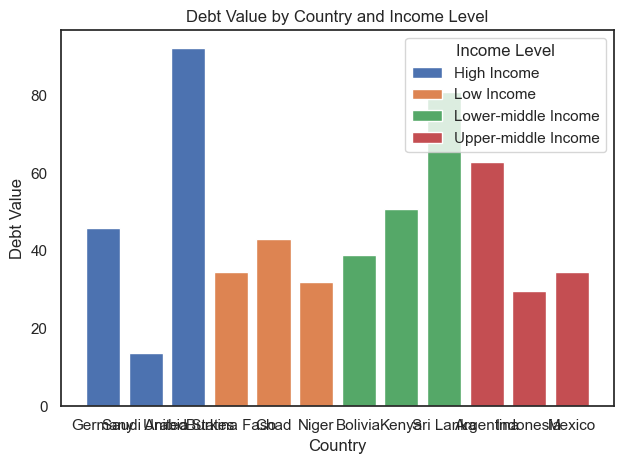

In [66]:
# Group the data by income level
grouped_data = data.groupby('income_level')

# Plot the bars for each income level group
for level, group in grouped_data:
    plt.bar(group['country_name'], group['debt_value'], label=level)


plt.legend(title='Income Level')
plt.xlabel('Country')
plt.ylabel('Debt Value')
plt.title('Debt Value by Country and Income Level')
plt.tight_layout()
plt.show()
